In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

faces = datasets.fetch_olivetti_faces()

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
faces.images.shape

(400, 64, 64)

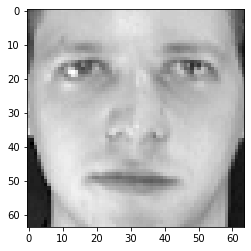

In [7]:
img = faces.images[0]
plt.imshow(img, cmap='gray')

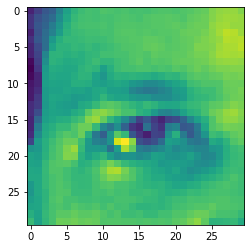

In [9]:
plt.imshow(img[:30,:30])

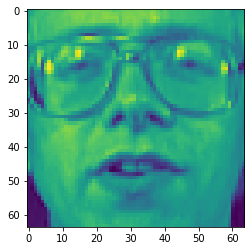

In [10]:
plt.imshow(faces.images[10])

In [39]:
def visual_multi(idx_start,n=10):
    n_plot = n
    fig=plt.figure(figsize=[8,5])
    for j in range(n_plot):
        plt.subplot(5,5,j+1)
        plt.imshow(faces.images[
            idx_start+j
        ], cmap='gray')
        plt.title(faces.target[
            idx_start+j
        ])
        plt.axis('off')
plt.show()

In [ ]:
visual_multi(50,20)
#plt.savefig('faces.jpg')